In [1]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()

Using the cleaned dataset created in assignment 1

In [3]:
data = pd.read_csv("../data/manipulated_data.csv")
data

,sex,age,income_bracket,year,total_sum_sek_millions,number_of_persons,region_name,level_of_education
0,Man,16-19,TOT,2018,547.9,38091,Stockholm,primary/lower secondary
1,Man,16-19,0,2018,0.0,13357,Stockholm,primary/lower secondary
2,Man,16-19,1-19,2018,137.9,17417,Stockholm,primary/lower secondary
3,Man,16-19,20-39,2018,106.1,3763,Stockholm,primary/lower secondary
4,Man,16-19,40-59,2018,77.2,1574,Stockholm,primary/lower secondary
...,...,...,...,...,...,...,...,...
409255,Woman,65-69,80-99,2012,0.9,10,Norrbotten,unknown
409256,Woman,70-75,TOT,2012,2.4,36,Norrbotten,unknown
409257,Woman,70-75,0,2012,0.0,11,Norrbotten,unknown
409258,Woman,70-75,1-19,2012,0.1,6,Norrbotten,unknown


Checking data types

In [4]:
data.dtypes


sex                        object
age                        object
income_bracket             object
year                        int64
total_sum_sek_millions    float64
number_of_persons           int64
region_name                object
level_of_education         object
dtype: object

To set data types correctly for each column the function and type map from assignment 1 is used.

In [5]:
def convert_types(type_map, df):
    for item in type_map.items():
        if item[1] == "int64":
            df[item[0]] = pd.to_numeric(df[item[0]], errors="coerce").astype("Int64")
        elif item[1] == "float64":
            df[item[0]] = pd.to_numeric(df[item[0]], errors="coerce").astype("float64")
        elif item[1] == "string":
            df[item[0]] = df[item[0]].astype("string")

In [6]:
type_map_data = {
    "region_name": "string",
    "level_of_education": "string",
    "sex": "string",
    "age": "string",
    "income_bracket": "string",
    "year": "int64",
    "total_sum_sek_millions": "float64",
    "number_of_persons": "int64",
}

convert_types(type_map_data, data)
data.dtypes


sex                       string[python]
age                       string[python]
income_bracket            string[python]
year                               Int64
total_sum_sek_millions           float64
number_of_persons                  Int64
region_name               string[python]
level_of_education        string[python]
dtype: object

**1. How many `NaN` values are there in each column?**

In [7]:
data.isna().sum()


sex                       0
age                       0
income_bracket            0
year                      0
total_sum_sek_millions    0
number_of_persons         0
region_name               0
level_of_education        0
dtype: int64

All data was cleaned in assignment 1 so now there is no NaN values anymore.

**3. Find out which unique values there are for `age`, `income_bracket`, `sex`, `region_name`, and, `level_of_education`, as well as the min/max/mean of the numeric columns.**

Catagorical columns:

In [8]:
print("Unique values for 'age':")
print(pd.Series(data["age"].unique()), end="\n\n")

print("Unique values for 'income_bracket':")
print(pd.Series(data["income_bracket"].unique()), end="\n\n")

print("Unique values for 'sex':")
print(pd.Series(data["sex"].unique()), end="\n\n")

print("Unique values for 'region_name':")
print(pd.Series(data["region_name"].unique()), end="\n\n")

print("Unique values for 'level_of_education':")
print(pd.Series(data["level_of_education"].unique()), end="\n\n")

Unique values for 'age':
0    16-19
1    20-29
2    30-39
3    40-49
4    50-59
5    60-64
6    65-69
7    70-75
dtype: string

Unique values for 'income_bracket':
0         TOT
1           0
2        1-19
3       20-39
4       40-59
5       60-79
6       80-99
7     100-119
8     120-139
9     140-159
10    160-179
11    180-199
12    200-219
13    220-239
14    240-259
15    260-279
16    280-299
17    300-319
18    320-339
19    360-379
20    400-499
21    500-599
22    340-359
23    380-399
24    600-799
25    800-999
26      1000+
dtype: string

Unique values for 'sex':
0      Man
1    Woman
dtype: string

Unique values for 'region_name':
0           Stockholm
1             Uppsala
2        Södermanland
3        Östergötland
4           Jönköping
5           Kronoberg
6              Kalmar
7             Gotland
8            Blekinge
9               Skåne
10            Halland
11    Västra Götaland
12           Värmland
13             Örebro
14        Västmanland
15            Dala

Numeric Columns:

In [10]:
data.describe().loc[["min", "mean", "max"]].round(2)

,year,total_sum_sek_millions,number_of_persons
min,2010.0,0.00,3.0
mean,2016.66,301.94,988.71
max,2023.0,186874.60,432620.0


**4. Produce a histogram of the ' _total sum sek millions_ measurements with 24 bins.**  You could do this by using (a) the Pandas API, or (b) the Seaborn API. 

(a) The Pandas API

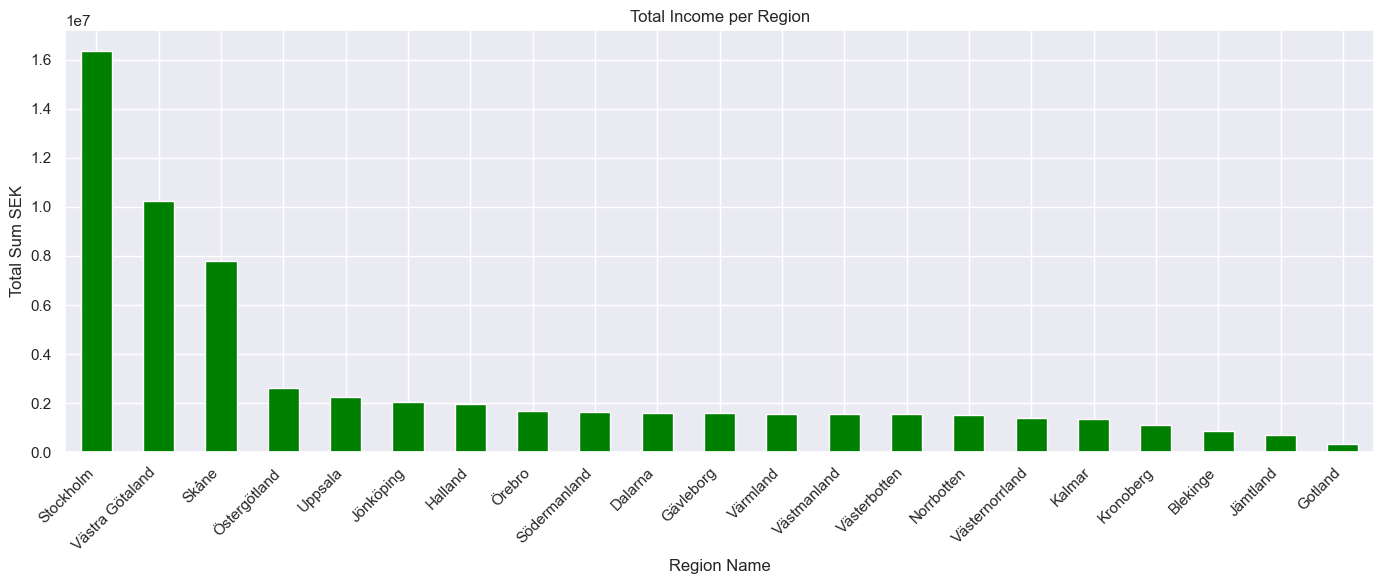

In [12]:
# Group by region and sum
# The region named Sverige is removed to make the plot a bit more interesting and clear.
region_income = (
    data[data["region_name"] != "Sverige"]
    .groupby("region_name")["total_sum_sek_millions"]
    .sum()
    .sort_values(ascending=False)
)

ax = region_income.plot.bar(color="green", figsize=(14, 6))
ax.set_xlabel("Region Name")
ax.set_ylabel("Total Sum SEK")
ax.set_title("Total Income per Region")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

(b) The Seaborn API

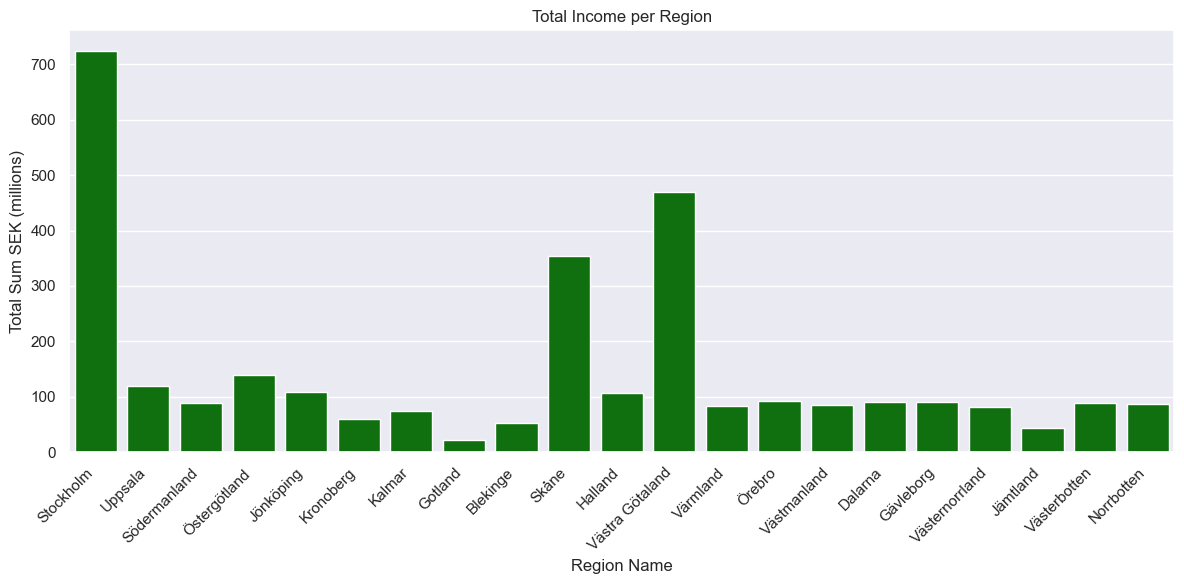

In [13]:
# The region named Sverige is removed to make the plot a bit more interesting and clear.
df = data[data["region_name"] != "Sverige"]


plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="region_name", y="total_sum_sek_millions", color="green", errorbar=None)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Region Name")
plt.ylabel("Total Sum SEK (millions)")
plt.title("Total Income per Region")
plt.tight_layout()
plt.show()

**5. Produce a histogram of _total sum sek millions_ and _region name_ that also conditions on _sex_.** In other words, play around with visualizations that show the distribution of income.

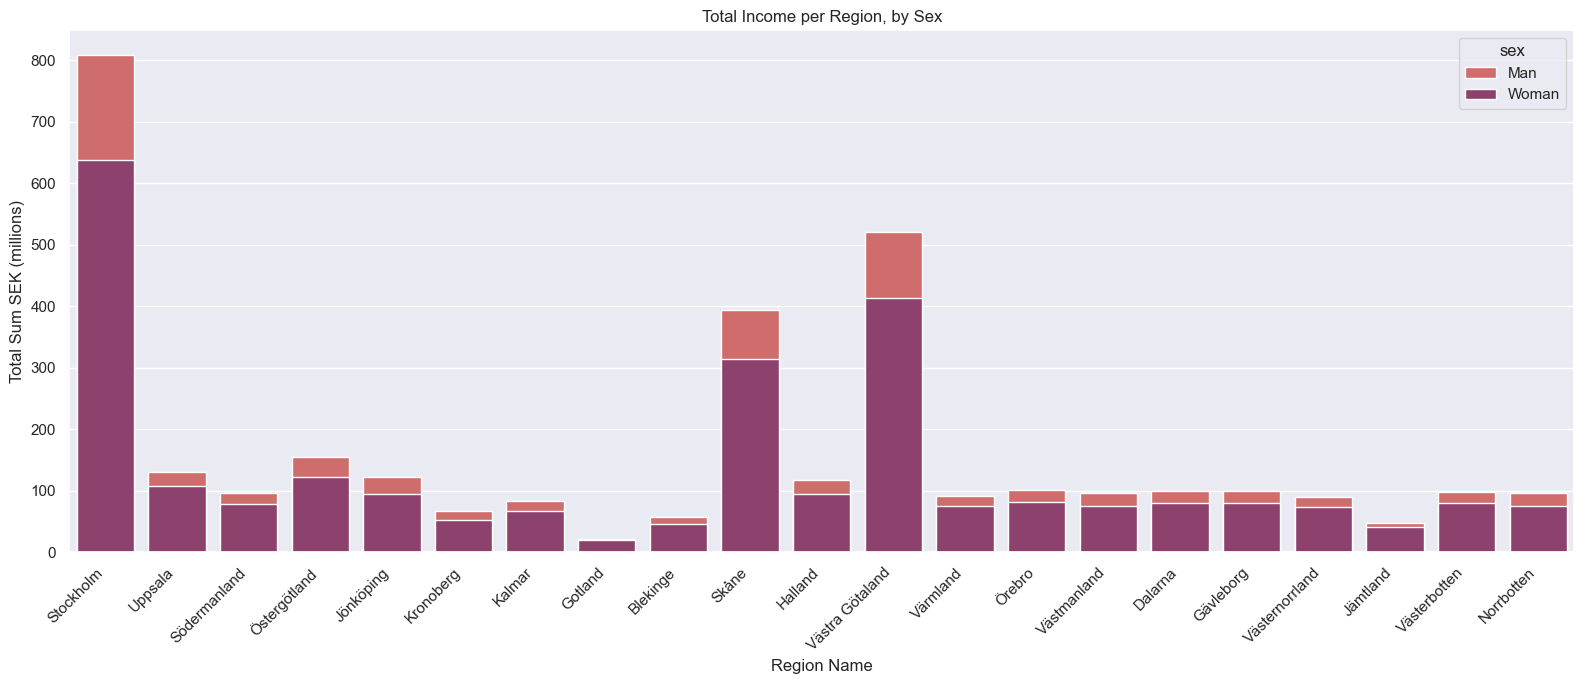

In [14]:
# The region named Sverige is removed to make the plot a bit more interesting and clear.
df = data[data["region_name"] != "Sverige"]

plt.figure(figsize=(16, 7))
sns.barplot(
    data=df,
    x="region_name",
    y="total_sum_sek_millions",
    hue="sex",
    errorbar=None,
    dodge=False,
    palette="flare",
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Region Name")
plt.ylabel("Total Sum SEK (millions)")
plt.title("Total Income per Region, by Sex")
plt.tight_layout()
plt.show()

**6. Do the same but with different variables, e.g., "number of persons" instead of "total sum sek millions", or "level of education" instead of "sex" as the conditional variable.** Remember, this is exploratory data analysis – you're trying to learn something about the dataset and get a better feel for how the data is distributed. There is no "right" or "wrong" plot to produce here, just plots that may be more or less useful for understanding the dataset.

I think this plot was interesting, clearly shows how many persons have which level of education for each region.

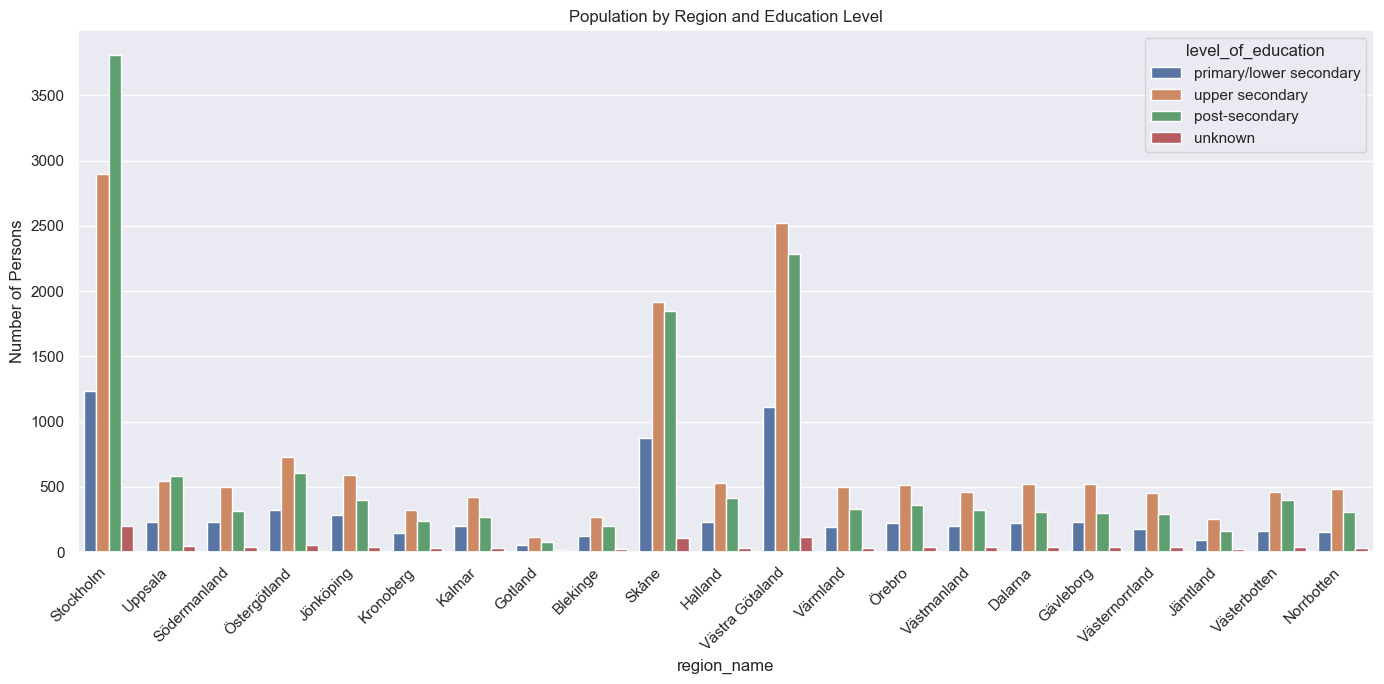

In [16]:
# The region named Sverige is removed to make the plot a bit more interesting and clear.
df = data[data["region_name"] != "Sverige"]

plt.figure(figsize=(14, 7))
sns.barplot(data=df, x="region_name", y="number_of_persons", hue="level_of_education", errorbar=None)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Persons")
plt.title("Population by Region and Education Level")
plt.tight_layout()
plt.show()

This plot is of course a bit misleading because there is no surprise that the more people the more money is earned, thats why the correlation is high. I added the "income per person" to show that if you split the income on each person the correlation is not high at all.

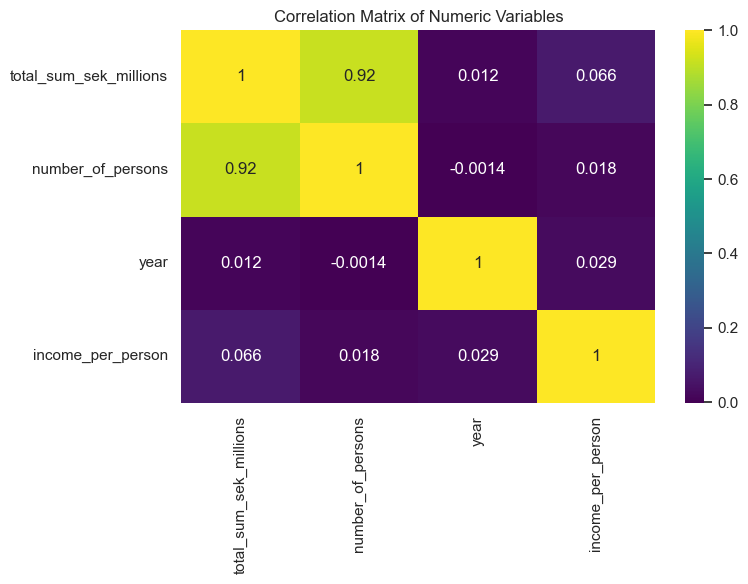

In [18]:
df = data.copy()

df["income_per_person"] = (df["total_sum_sek_millions"] * 1e6) / df["number_of_persons"]

plt.figure(figsize=(8, 6))
sns.heatmap(
    df[["total_sum_sek_millions", "number_of_persons", "year", "income_per_person"]].corr(), annot=True, cmap="viridis"
)
plt.title("Correlation Matrix of Numeric Variables")
plt.tight_layout()
plt.show()

**7. Turn one of your histograms into a KDE plot.** Again, Seaborn makes this easy by just changing one keyword argument. But what does that KDE plot tell you? How does it differ from the histogram? Which one do you find more useful on the variables you looked at?

Turning our data into KDE plots was very difficult, but below is some attempts.

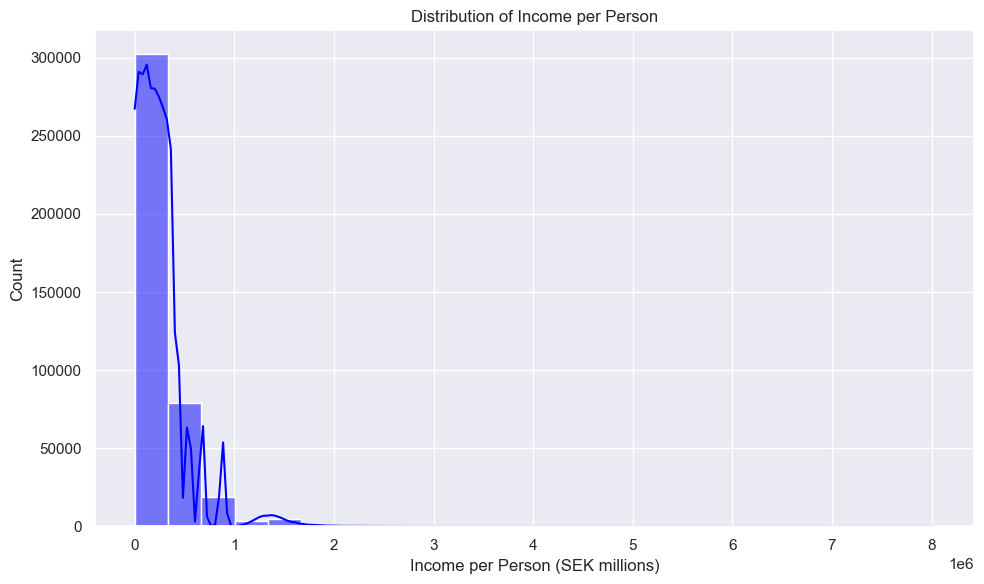

In [19]:
df = data.copy()

df["income_per_person"] = (df["total_sum_sek_millions"] * 1e6) / df["number_of_persons"]

plt.figure(figsize=(10, 6))
sns.histplot(df["income_per_person"], bins=24, kde=True, color="blue")
plt.xlabel("Income per Person (SEK millions)")
plt.title("Distribution of Income per Person")
plt.tight_layout()
plt.show()

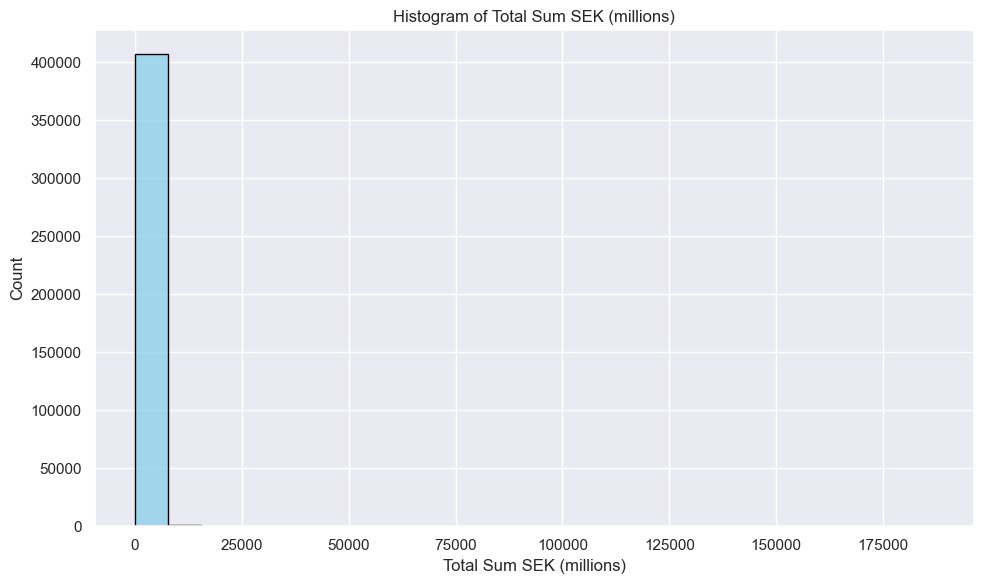

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data["total_sum_sek_millions"], bins=24, color="skyblue", edgecolor="black")
plt.xlabel("Total Sum SEK (millions)")
plt.title("Histogram of Total Sum SEK (millions)")
plt.tight_layout()
plt.show()

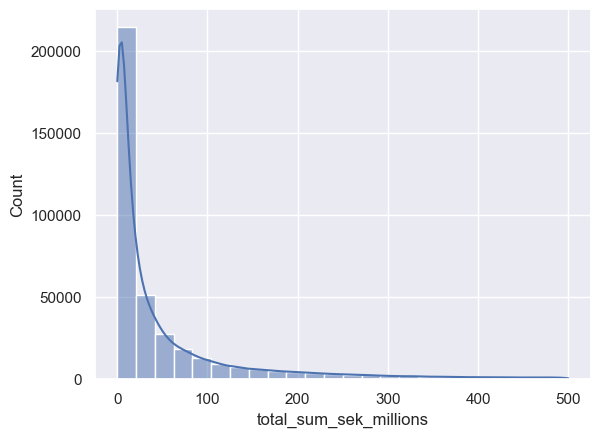

In [21]:
filtered = data[data["total_sum_sek_millions"] < 500]

sns.histplot(filtered["total_sum_sek_millions"], bins=24, kde=True);

Let's show the relationship between two _numeric_ variables:

**8. Make a scatter plot showing the relationship between _total sum sek millions_ and _number of persons_.**

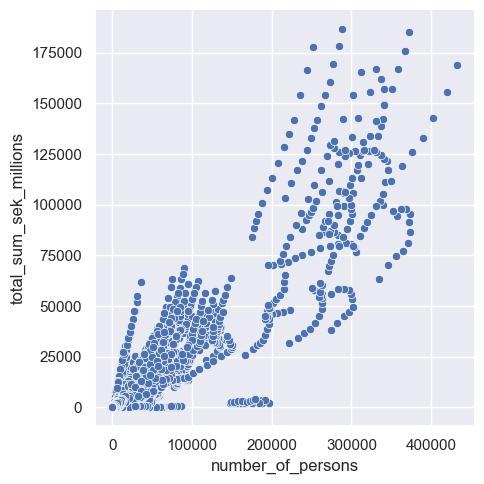

In [22]:
sns.relplot(data=df, x="number_of_persons", y="total_sum_sek_millions");

**Make a scatter plot showing the relationship between _income per person_ and _year_.**

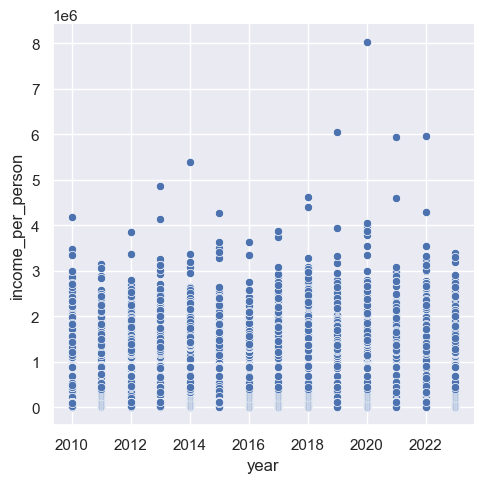

In [23]:
df = data.copy()

df["income_per_person"] = (df["total_sum_sek_millions"] * 1e6) / df["number_of_persons"]

sns.relplot(data=df, x="year", y="income_per_person");

Let's add a categorical variable, so that we're now visualizing _three_ different variables in one plot:

**9. Make the same scatter plot as in Q8, but add _color_ to condition on the _level of education_.**

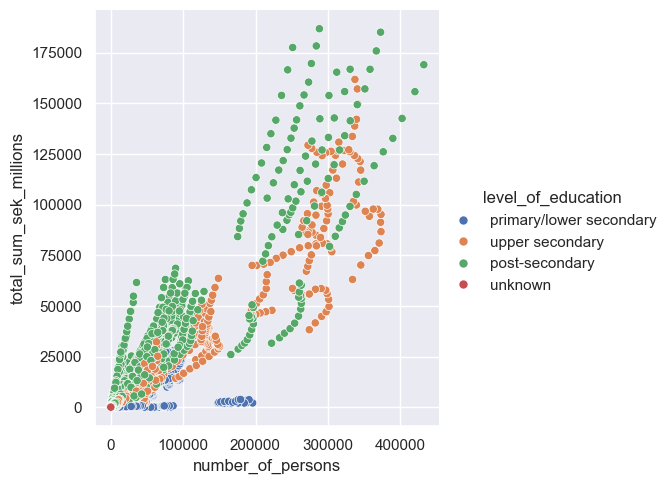

In [24]:
sns.relplot(data=df, x="number_of_persons", y="total_sum_sek_millions", hue="level_of_education");

I do the same for the second plot from Q8.

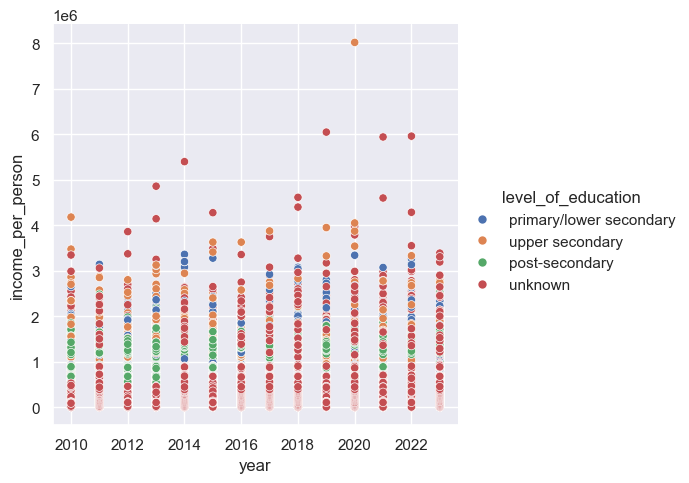

In [25]:
df = data.copy()

df["income_per_person"] = (df["total_sum_sek_millions"] * 1e6) / df["number_of_persons"]

sns.relplot(data=df, x="year", y="income_per_person", hue="level_of_education");

Seaborn can conveniently perform some basic _modelling_ on the data as well. Based on the plots above, we might feel pretty sure that there's strong correlation between _total sum sek millions_ and _number of persons_, but we can also quickly perform & plot a linear regression model to support this.

**10. Plot a _linear regression_ between _total sum sek millions_ and _number of persons_, both with and without conditioning on the _level of education_.**

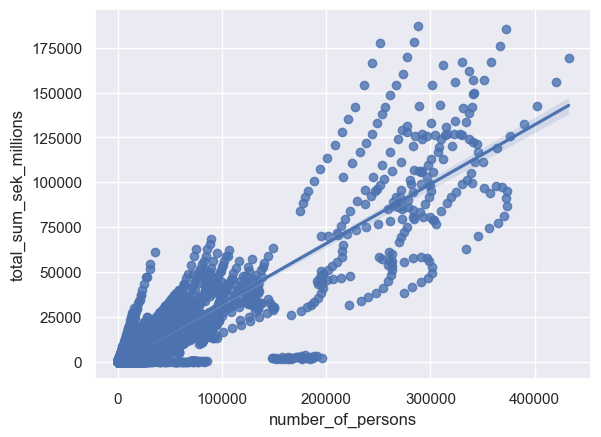

In [26]:
sns.regplot(data=df, x="number_of_persons", y="total_sum_sek_millions");

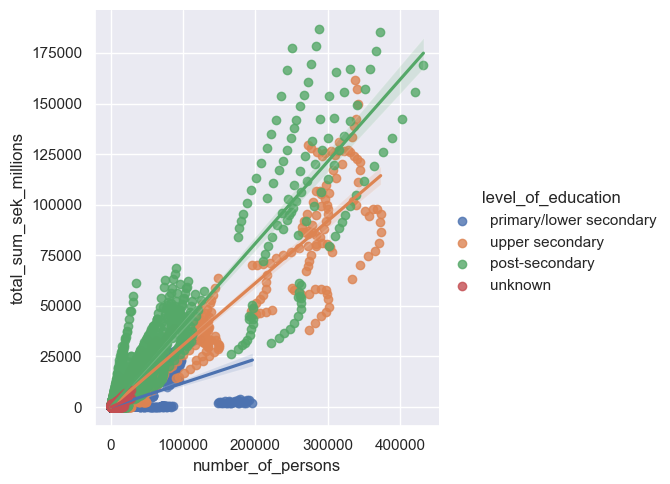

In [27]:
sns.lmplot(data=df, x="number_of_persons", y="total_sum_sek_millions", hue="level_of_education");

Let's extend our visualization to _four_ variables. Seaborn offers "facet grids" as a way to quickly produce multiple plots in a grid, where the columns (and/or rows) now represent our fourth variable.

**11. Make a _facet grid_ that's the same as Q9, but distinguishes the _sex_ of the people in separate columns.**

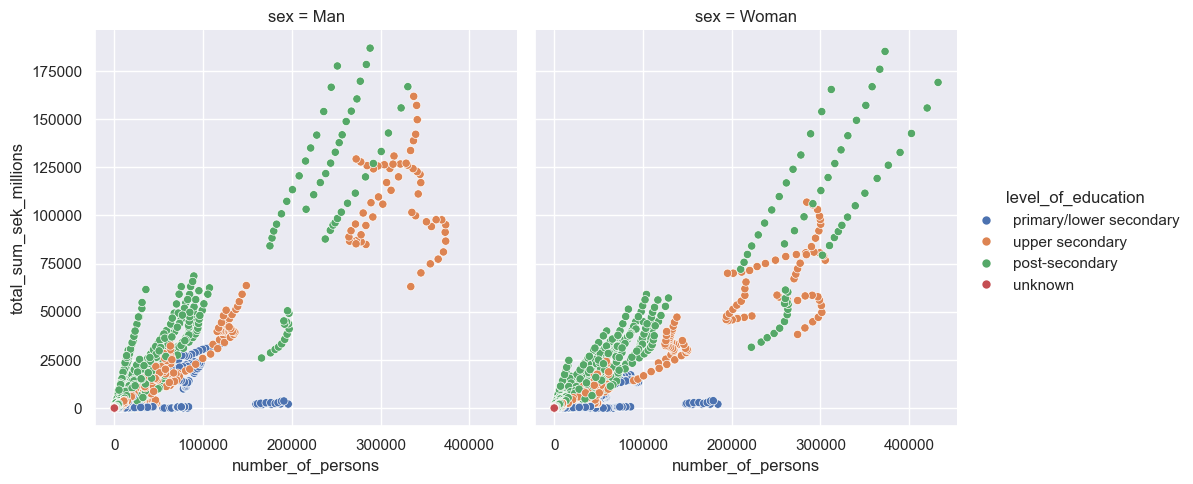

In [28]:
sns.relplot(data=data, x="number_of_persons", y="total_sum_sek_millions", hue="level_of_education", col="sex");

**12. Make a _categorical scatter plot_ that uses _level of education_ as the categorical variable, and _total sum sek millions_ as the numeric variable.**

<Figure size 1000x600 with 0 Axes>

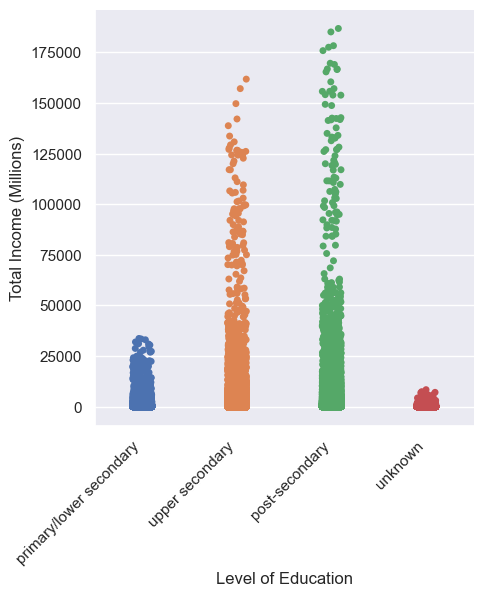

In [29]:
plt.figure(figsize=(10, 6))
sns.catplot(data=data, x="level_of_education", y="total_sum_sek_millions", hue="level_of_education")

plt.xticks(rotation=45, ha="right")
plt.xlabel("Level of Education")
plt.ylabel("Total Income (Millions)");

**13. Make a _box plot_ analogous to Q12, i.e., using _level of education_ as the categorical variable, and _year_ as the numeric variable.**

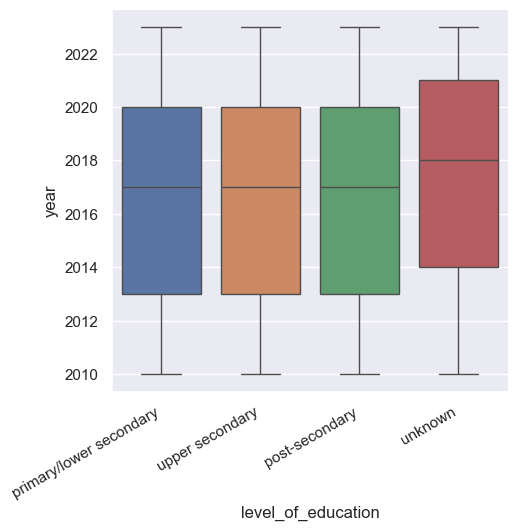

In [30]:
g = sns.catplot(data=data, x="level_of_education", y="year", kind="box", hue="level_of_education")
g.figure.autofmt_xdate()

Box plots wasn't that easy to get something useful out of. Here is one more plot, everything else tested didn't show anything.

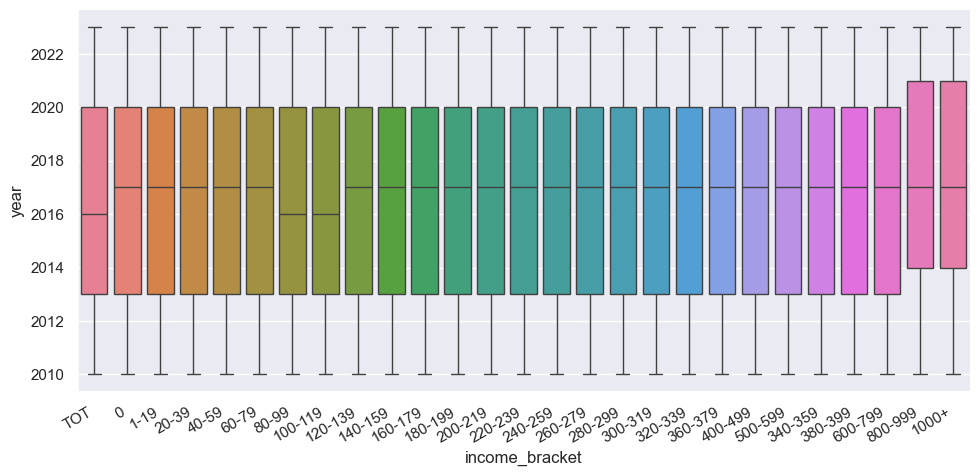

In [31]:
g = sns.catplot(data=data, x="income_bracket", y="year", kind="box", hue="income_bracket", aspect=2)
g.figure.autofmt_xdate();

A categorical variable we haven't looked at so far is the _income bracket_ for each person. Let's see how many people there is in each income bracket.

**14. Make a _bar plot_ showing the count of people in each income bracket and which _sex_ they have.**

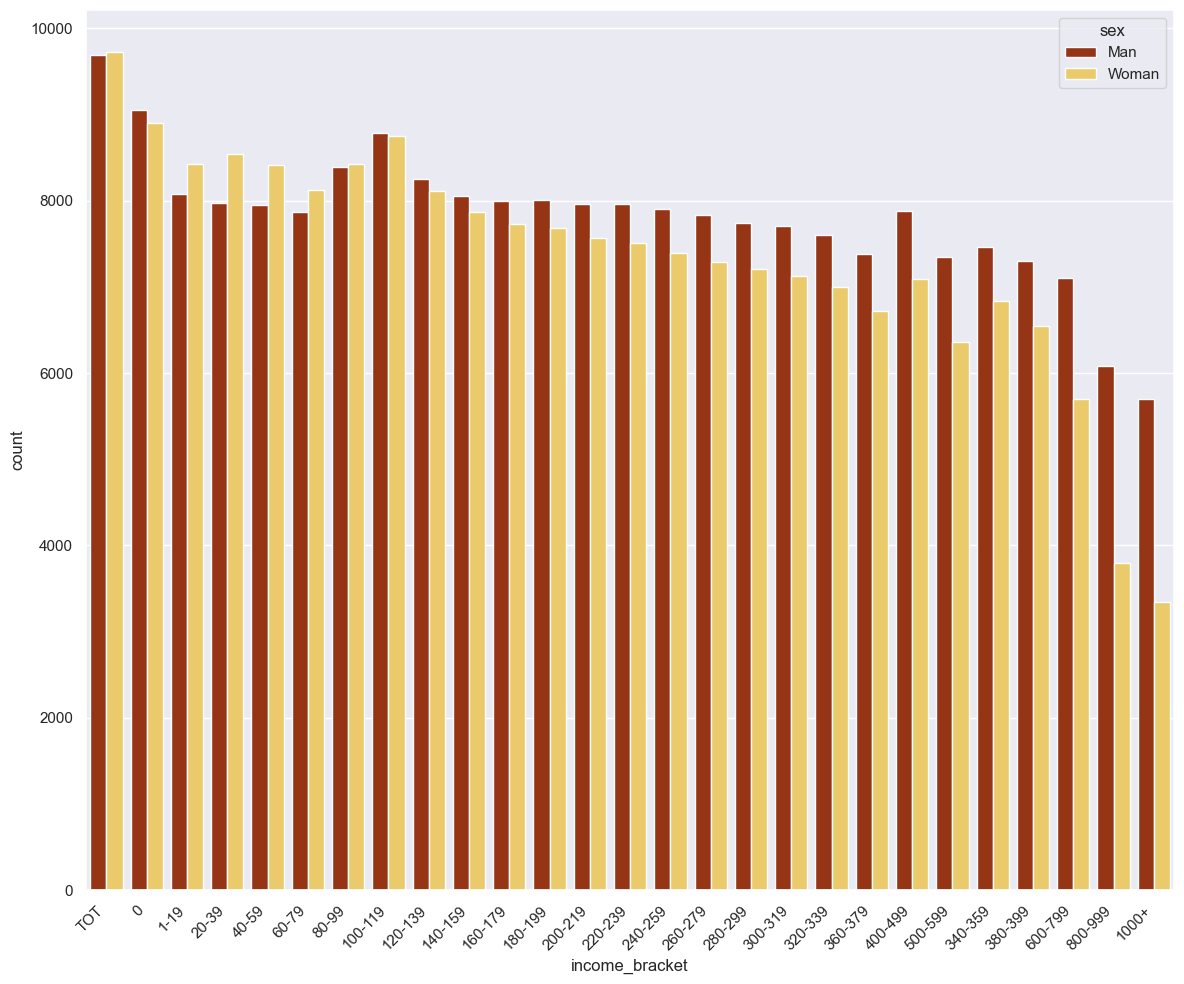

In [32]:
plt.figure(figsize=(12, 10))

sns.countplot(data=data, x="income_bracket", hue="sex", palette="afmhot");
plt.xticks(rotation=45, ha="right")
plt.tight_layout();

**15. Make a _line plot_ showing the relationship between _year_ and _total sum sek millions_.**

Make year a proper datetime column.

In [33]:
data = pd.read_csv("../data/manipulated_data.csv")

data["year"]


0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
409255    2012
409256    2012
409257    2012
409258    2012
409259    2012
Name: year, Length: 409260, dtype: int64

In [34]:
datetime_df = data.copy()

datetime_df["year"] = pd.to_datetime(data["year"], format="%Y")

datetime_df["year"]


0        2018-01-01
1        2018-01-01
2        2018-01-01
3        2018-01-01
4        2018-01-01
            ...    
409255   2012-01-01
409256   2012-01-01
409257   2012-01-01
409258   2012-01-01
409259   2012-01-01
Name: year, Length: 409260, dtype: datetime64[ns]

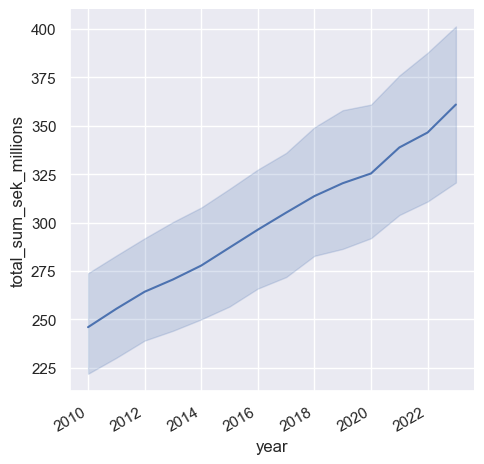

In [35]:
g = sns.relplot(data=datetime_df, x="year", y="total_sum_sek_millions", kind="line")
g.figure.autofmt_xdate();

15.1 We will now make a plot to see how the mean average salary have changed throughout the years 2010 to 2022.


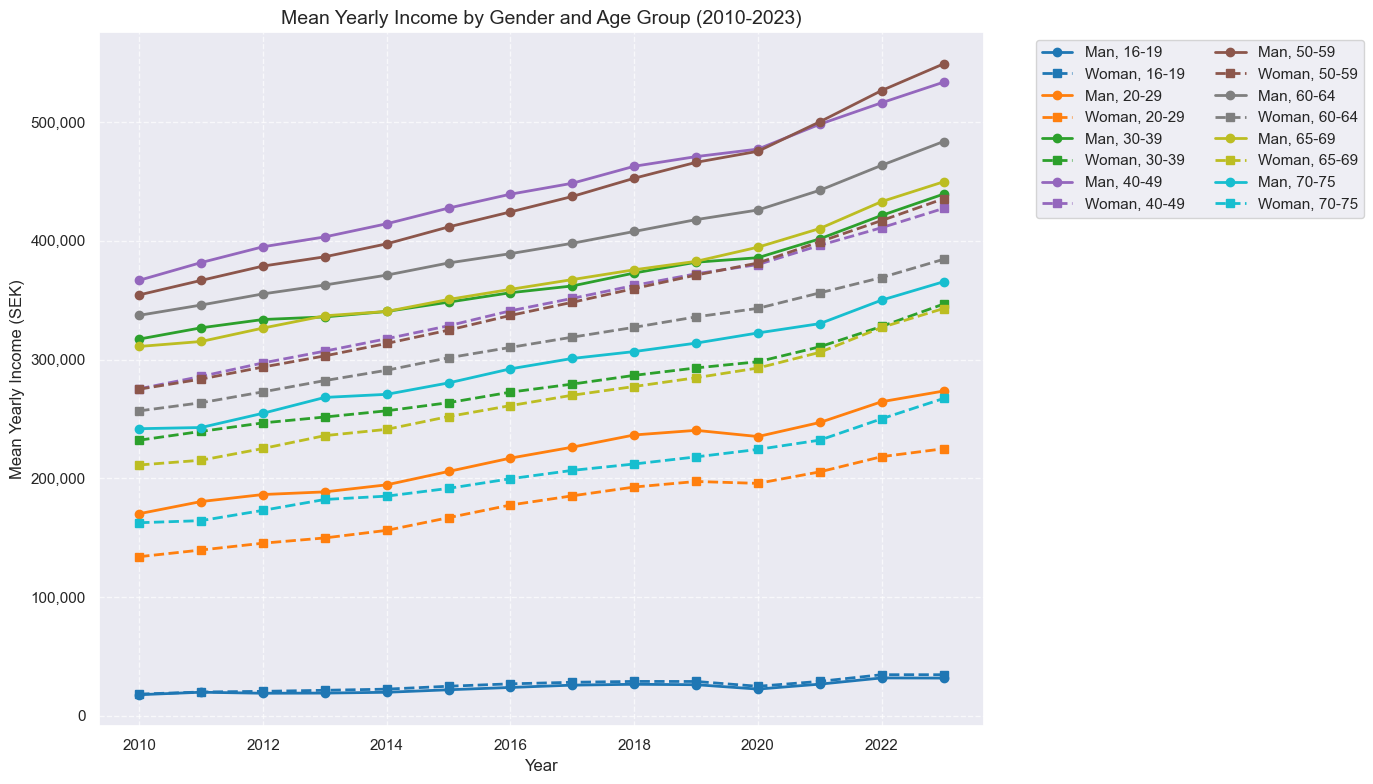

In [17]:
# Create a new grouping by sex, age, and year
c = df.groupby(["sex", "age", "year"]).agg({
    "total_sum_sek_millions": "sum",
    "number_of_persons": "sum"
})

# Convert from millions to actual value
c["total_sum_sek_millions"] = c["total_sum_sek_millions"] * 1_000_000

# Calculate mean income yearly
c["mean_income_yearly"] = c["total_sum_sek_millions"] / c["number_of_persons"]
c["mean_income_yearly"] = c["mean_income_yearly"].round().astype(int)

# Reset index for plotting
c_reset = c.reset_index()

# Create a larger figure for the more complex visualization
plt.figure(figsize=(14, 8))

# Get unique age groups and assign colors
age_groups = sorted(c_reset['age'].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(age_groups)))

# Plot for each gender with different line styles
line_styles = {'Man': '-', 'Woman': '--'}

# Create a plot for the most recent year (or you can choose another approach)
selected_year = c_reset['year'].max()  # Most recent year

for i, age_group in enumerate(age_groups):
    for gender in ['Man', 'Woman']:
        # Filter data for this gender and age group
        data = c_reset[(c_reset['sex'] == gender) & (c_reset['age'] == age_group)]
        
        if not data.empty:
            plt.plot(data['year'], data['mean_income_yearly'], 
                     linestyle=line_styles[gender], color=colors[i],
                     marker='o' if gender == 'Man' else 's', 
                     linewidth=2, 
                     label=f"{gender}, {age_group}")

plt.title('Mean Yearly Income by Gender and Age Group (2010-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Yearly Income (SEK)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend with multiple columns if there are many age groups
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

# Format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()

15.2 We will also make a plot where we show how the average salary has increase year-over-year for men and women. This is a very interesting graph, although this is very biased and no real conclusions can be drawn from this since data such as hours worked and profession are missing.

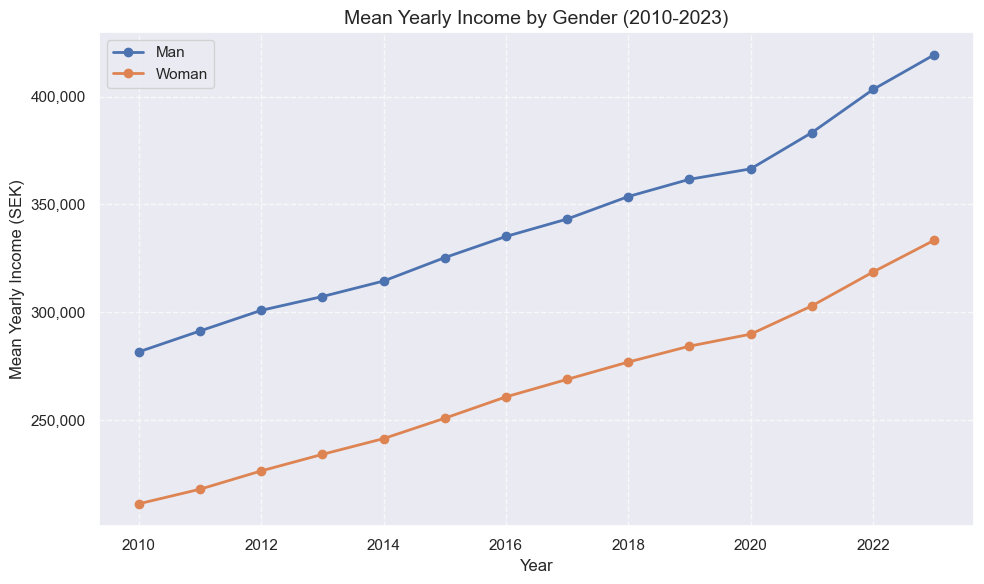

In [19]:
a = df.copy()
b = a.groupby(["sex", "year"]).agg({
    "total_sum_sek_millions": "sum",
    "number_of_persons": "sum"
})

b["total_sum_sek_millions"] = b["total_sum_sek_millions"] * 1_000_000
b["mean_income_yearly"] = b["total_sum_sek_millions"] / b["number_of_persons"]
b["mean_income_yearly"] = b["mean_income_yearly"].round().astype(int)

b_reset = b.reset_index()
b_reset.head()

b_reset = b.reset_index()

plt.figure(figsize=(10, 6))

for gender in ['Man', 'Woman']:
    gender_data = b_reset[b_reset['sex'] == gender]
    
    plt.plot(gender_data['year'], gender_data['mean_income_yearly'], 
             marker='o', linewidth=2, label=gender)

plt.title('Mean Yearly Income by Gender (2010-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Yearly Income (SEK)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend()
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()

**16. Make a _line plot_ showing the relationship between _date_ and the other numeric variables plotted as separate lines in different colors.**

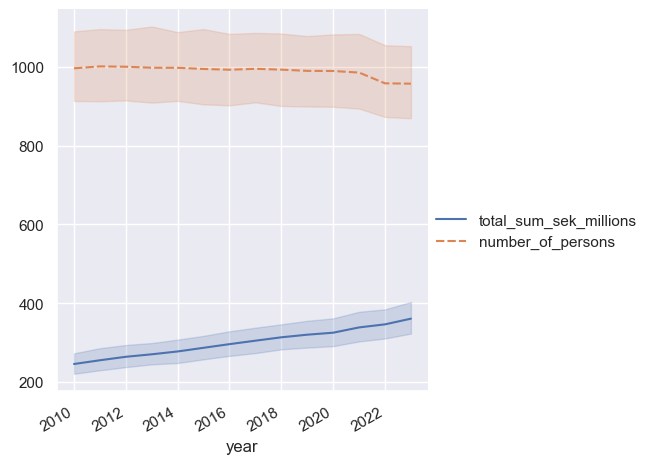

In [36]:
datetime_rs = datetime_df.set_index("year")[["total_sum_sek_millions", "number_of_persons"]]
g = sns.relplot(data=datetime_rs, kind="line")
g.figure.autofmt_xdate()

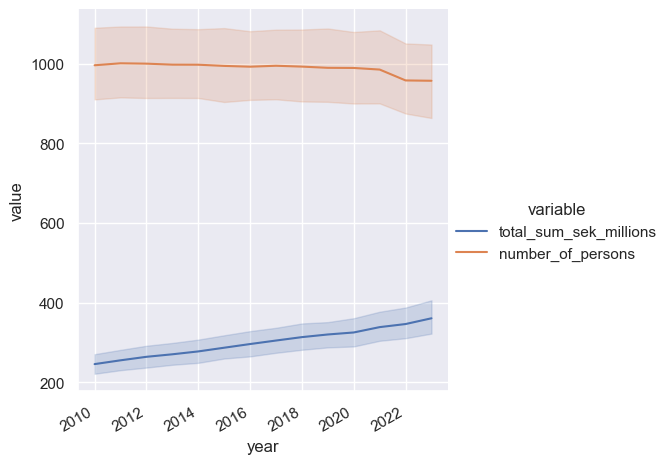

In [37]:
datetime_melt = datetime_df.melt(id_vars=["year"], value_vars=["total_sum_sek_millions", "number_of_persons"])
g = sns.relplot(data=datetime_melt, x="year", y="value", hue="variable", kind="line")
g.figure.autofmt_xdate()

- - - 
## Controlling figure aesthetics (on a line plot)


**1. Change the plot style so that it has a white background with ticks on the axes, and no _spines (borders)_ on the top and right-hand side.**

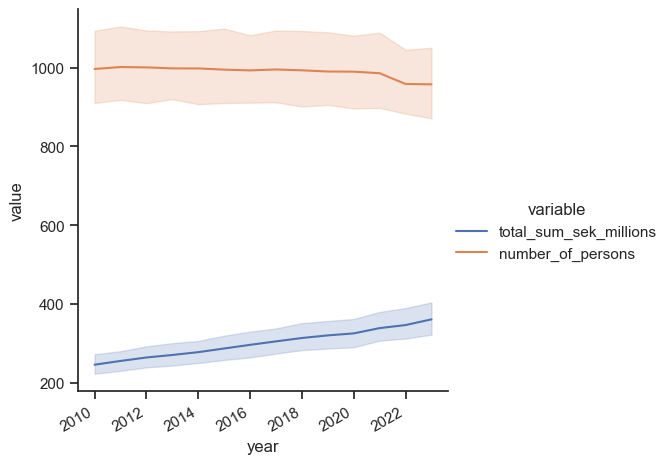

In [38]:
sns.set_style("ticks")
g = sns.relplot(data=datetime_melt, x="year", y="value", hue="variable", kind="line")
g.figure.autofmt_xdate()
sns.despine()

**2. Change the plot so that it is larger, and also has larger fonts and thicker lines.** Make sure that the legend doesn't cover up the lines of the plot, though.

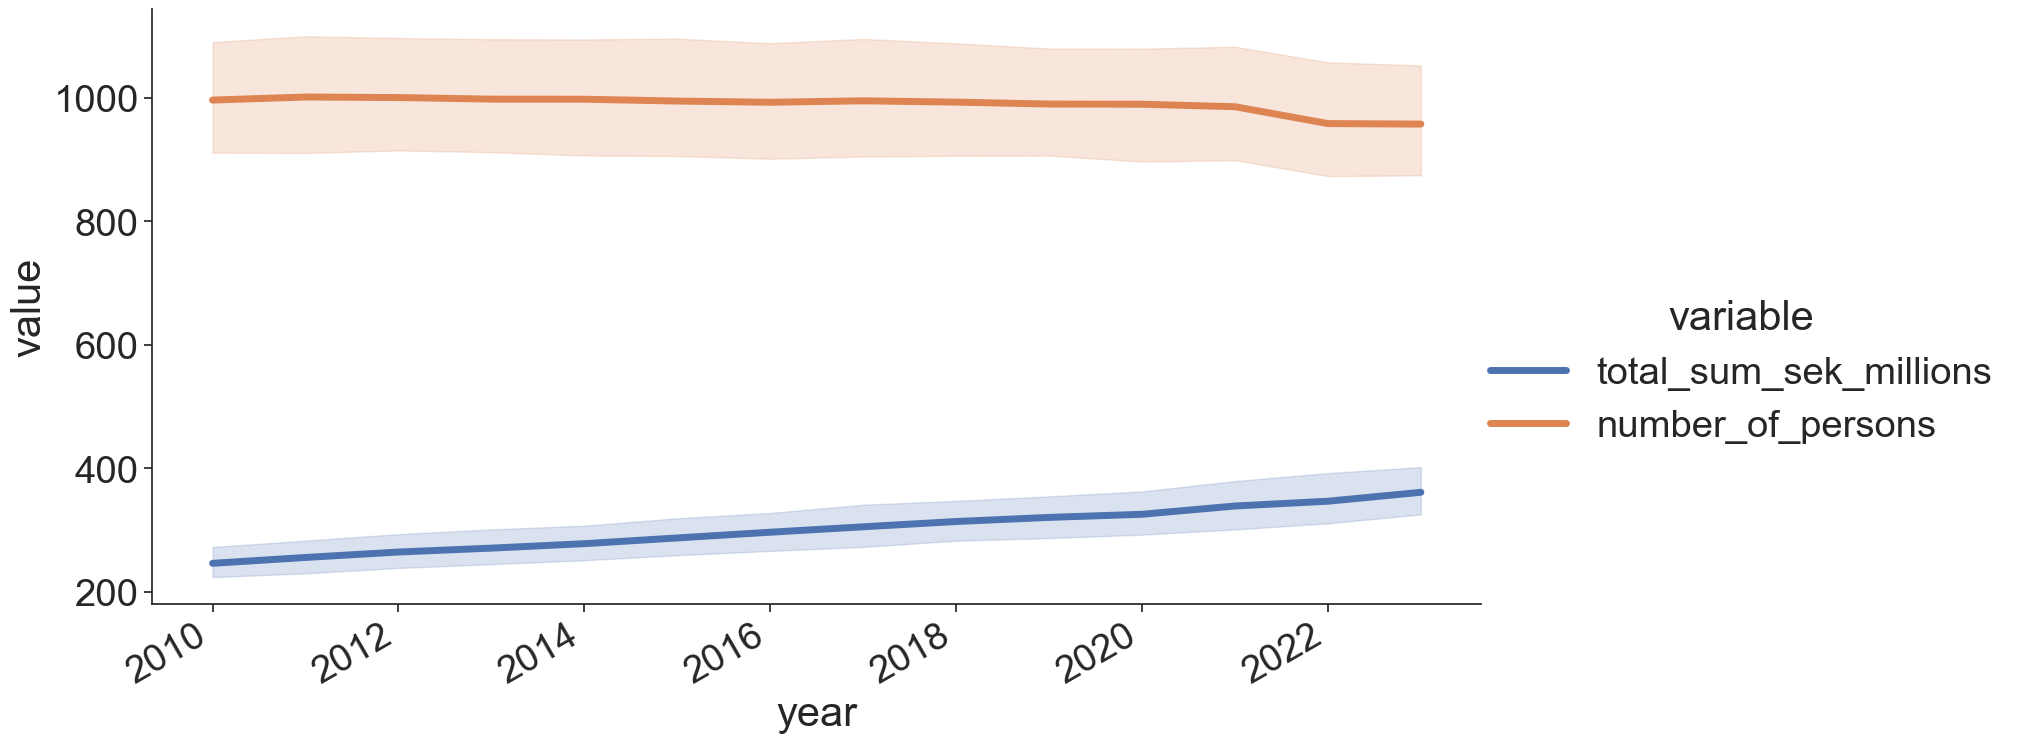

In [39]:
with sns.plotting_context("notebook", font_scale=2.5, rc={"lines.linewidth": 5}):
    g = sns.relplot(
        data=datetime_melt,
        x="year",
        y="value",
        hue="variable",
        kind="line",
        height=8,
        aspect=2,
    )
    g.figure.autofmt_xdate()

**3. Change the *y*-axis so that it has "major" ticks every 100 steps, and "minor" ticks every 50 steps.**

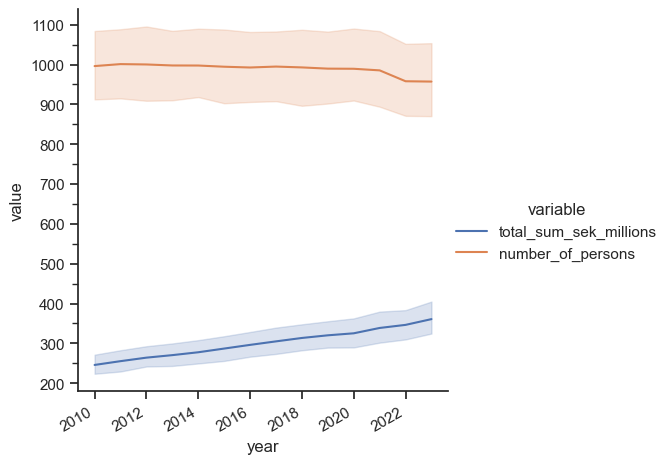

In [40]:
g = sns.relplot(data=datetime_melt, x="year", y="value", hue="variable", kind="line")
g.figure.autofmt_xdate()
ax = g.figure.axes[0]

ax.yaxis.set_major_locator(plt.MultipleLocator(100))
ax.yaxis.set_minor_locator(plt.MultipleLocator(50))

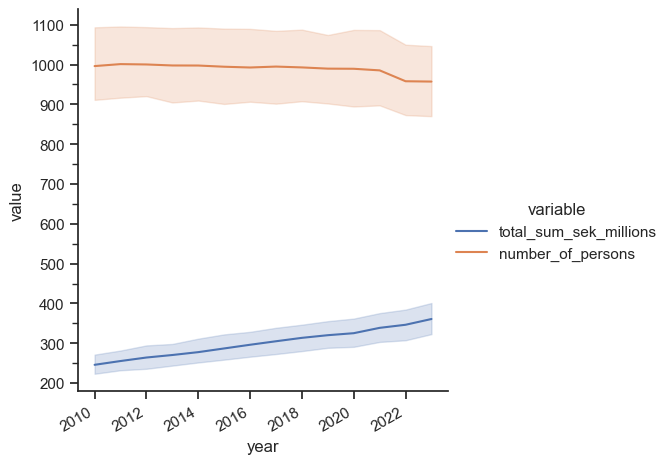

In [41]:
g = sns.relplot(data=datetime_melt, x="year", y="value", hue="variable", kind="line")
g.figure.autofmt_xdate()
ax = g.figure.axes[0]

ax.set_yticks(list(range(200, 1101, 100)))
ax.set_yticks(list(range(200, 1101, 50)), minor=True);

**4. Turn off the "error band" plotting.**

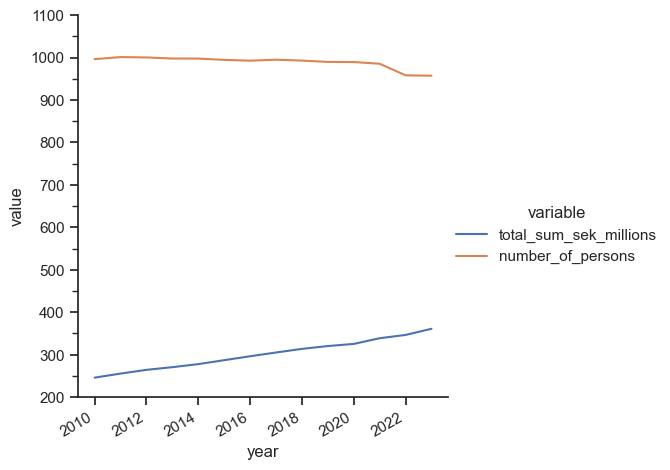

In [42]:
g = sns.relplot(data=datetime_melt, x="year", y="value", hue="variable", kind="line", errorbar=None, markers=True)
g.figure.autofmt_xdate()
ax = g.figure.axes[0]

ax.set_yticks(list(range(200, 1101, 100)))
ax.set_yticks(list(range(200, 1101, 50)), minor=True);

**5. Plot _markers_ for each data point and make all lines solid.**

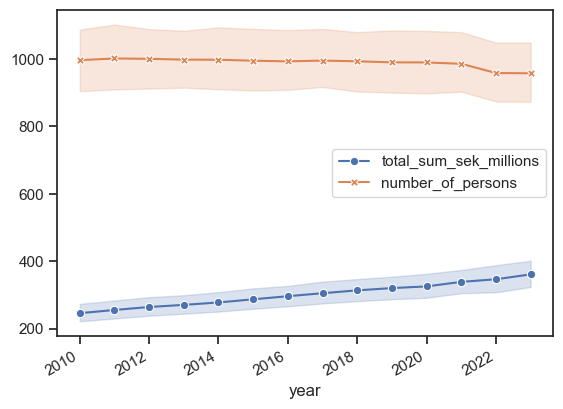

In [43]:
g = sns.lineplot(data=datetime_df.set_index("year"), markers=True, dashes=False)
g.figure.autofmt_xdate()

- - - 
## Controlling figure aesthetics (on categorical plots & facet grids)

**6. Create a scatter plot that shows the relation between _number of persons_ and _total sum sek millions_ and color by the _sex_ of the people:**

Tasks to be done:
- **Make a scatter plot** of _number of persons_ and _total sum sek millions_ that shows the _sex_ in different colors.
- **Set the _x_-axis to have minor ticks for every 10000 people and _y_-axis to have minor ticks every 5000 in income.**
- **Set the _x_-axis to have major ticks for every 50000 people and _y_-axis to have major ticks every 25000 in income.**
- **Change the _axis labels_ to read "Number of People" and "Total Income"** instead of their default values.
- **Move the legend outside the plot area.**
- **Make sure all values on the _x_-axis is clearly visible.**

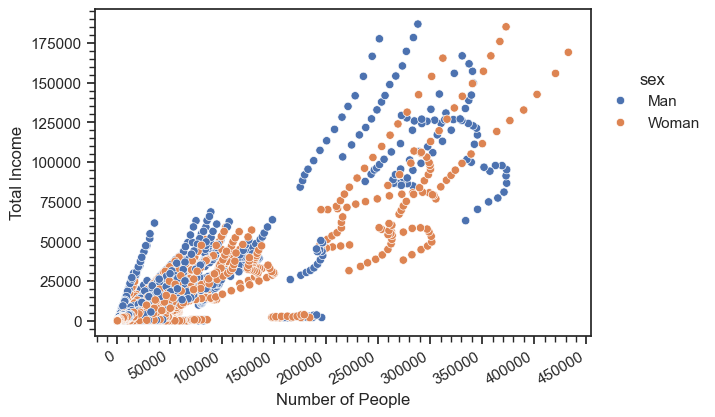

In [44]:
sns.set_style("ticks")
ax = sns.scatterplot(
    data=data,
    x="number_of_persons",
    y="total_sum_sek_millions",
    hue="sex",
    palette="deep",
)

ax.yaxis.set_major_locator(plt.MultipleLocator(25000))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5000))

ax.xaxis.set_major_locator(plt.MultipleLocator(50000))
ax.xaxis.set_minor_locator(plt.MultipleLocator(10000))

ax.set_ylabel("Total Income")
ax.set_xlabel("Number of People")

sns.move_legend(
    ax,
    "upper left",
    bbox_to_anchor=(1, 0.85),
    frameon=False,
)

ax.figure.autofmt_xdate()

**7. Turn the scatter plot above into a _FacetGrid_ of four scatter plots that distinguish by _level of education_.**

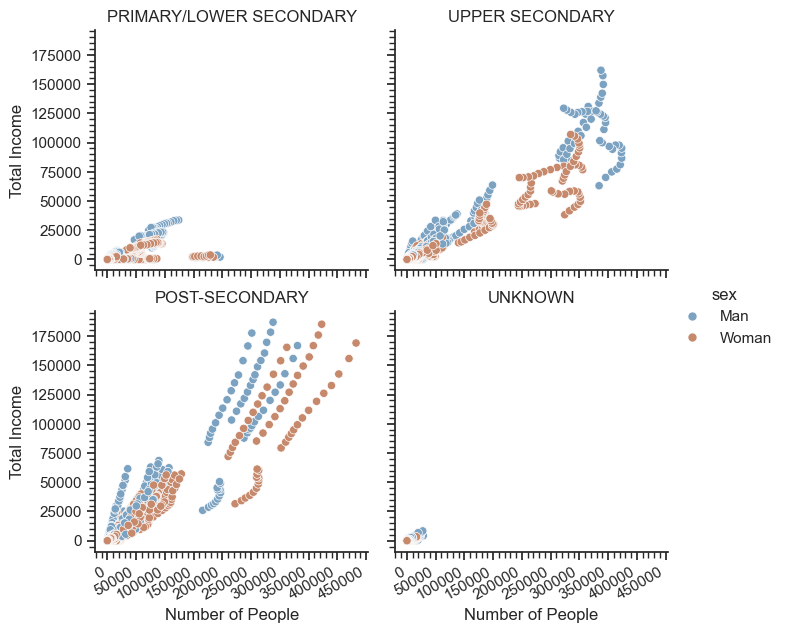

In [45]:
sns.set_style("ticks")
facet = sns.relplot(
    data=data,
    x="number_of_persons",
    y="total_sum_sek_millions",
    hue="sex",
    col="level_of_education",
    col_wrap=2,
    palette="twilight_shifted",
    height=3.5,
)

for ax in facet.axes.flat:
    ax.yaxis.set_major_locator(plt.MultipleLocator(25000))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(5000))
    ax.xaxis.set_major_locator(plt.MultipleLocator(50000))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(10000))

facet.set_axis_labels("Number of People", "Total Income")
facet.set_titles(col_template="{col_name}")

for ax in facet.axes.flat:
    ax.set_title(ax.get_title().upper())

facet.figure.autofmt_xdate()

**8. Pick individual colors for different _level of education_.** Below is a simple strip plot showing the distribution of _level of education_ and _total sum sek millions_ without any coloring. Then I use the _plasma_ palette to color the _level of education_

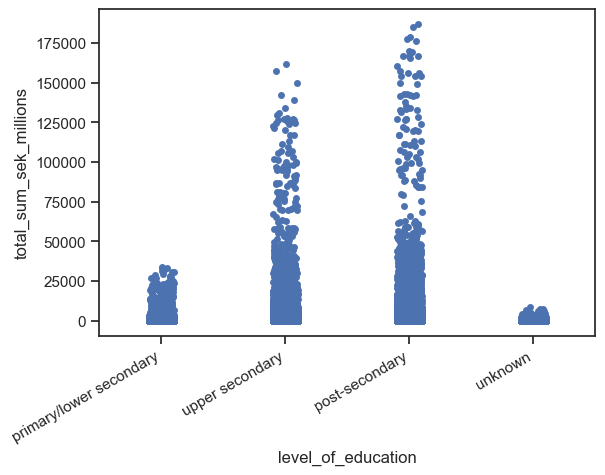

In [46]:
g = sns.stripplot(data=data, x="level_of_education", y="total_sum_sek_millions")

g.figure.autofmt_xdate()

In [47]:
plasma = sns.color_palette("plasma")

plasma

[
    (0.32515, 0.006915, 0.639512),
    (0.546157, 0.038954, 0.64701),
    (0.723444, 0.196158, 0.538981),
    (0.85975, 0.360588, 0.406917),
    (0.95547, 0.533093, 0.28549),
    (0.994495, 0.74088, 0.166335)
]

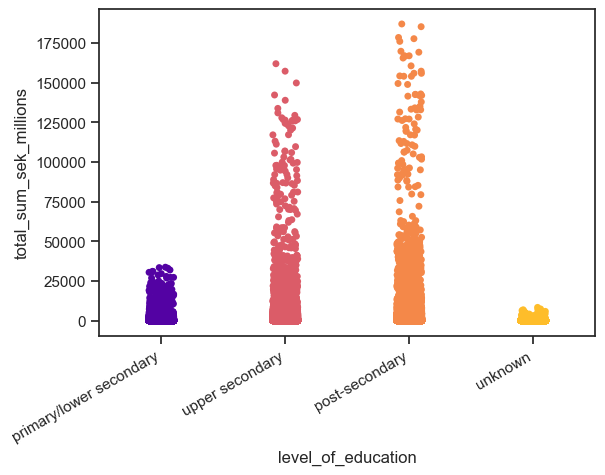

In [48]:
g = sns.stripplot(
    data=data,
    x="level_of_education",
    y="total_sum_sek_millions",
    hue="level_of_education",
    palette={
        "primary/lower secondary": plasma[0],
        "upper secondary": plasma[3],
        "post-secondary": plasma[4],
        "unknown": plasma[5],
    },
)

g.figure.autofmt_xdate()

In [49]:

## pip install geopandas
## pip install swemaps
##https://github.com/stefur/swemaps?tab=readme-ov-file
import geopandas as gpd
import swemaps
import matplotlib.patches as mpatches

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│   2 ## pip install swemaps                                                                       │
│   3 ##https://github.com/stefur/swemaps?tab=readme-ov-file                                       │
│   4 import geopandas as gpd                                                                      │
│ ❱ 5 import swemaps                                                                               │
│   6 import matplotlib.patches as mpatches                                                        │
│   7                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'swemaps'

# Exploring More Interactive and Engaging Visualizations

# Beyond traditional charts, we set out to explore more creative and interactive approaches to data visualization

We read in the data

In [ ]:
data = "../data/Data_2010-2023.csv"
df = pd.read_csv(data)
print(print(df.dtypes))

data = "../data/region_data.csv"
region_df = pd.read_csv(data)
region_df = region_df.rename(columns={
    'region_code': 'Region Code',
    'region_name': 'Region Name'
})
print(print(region_df.dtypes))

region                     int64
level_of_education        object
sex                        int64
age                       object
income_bracket            object
year                       int64
total_sum_sek_millions    object
number_of_persons         object
dtype: object
None
Region Code     int64
Region Name    object
dtype: object
None


Preprossing

In [ ]:
df['total_sum_sek_millions'] = pd.to_numeric(df['total_sum_sek_millions'], errors='coerce')
df['number_of_persons'] = pd.to_numeric(df['number_of_persons'], errors='coerce')
print(print(df.dtypes))

region                      int64
level_of_education         object
sex                         int64
age                        object
income_bracket             object
year                        int64
total_sum_sek_millions    float64
number_of_persons         float64
dtype: object
None


Merge the data together.

In [ ]:
df_merged = df.merge(region_df[['Region Code', 'Region Name']], left_on='region', right_on='Region Code', how='left')
df_merged

,region,level_of_education,sex,age,income_bracket,year,total_sum_sek_millions,number_of_persons,Region Code,Region Name
0,1,21,1,16-19,TOT,2018,547.9,38091.0,1,Stockholm
1,1,21,1,16-19,0,2018,0.0,13357.0,1,Stockholm
2,1,21,1,16-19,1-19,2018,137.9,17417.0,1,Stockholm
3,1,21,1,16-19,20-39,2018,106.1,3763.0,1,Stockholm
4,1,21,1,16-19,40-59,2018,77.2,1574.0,1,Stockholm
...,...,...,...,...,...,...,...,...,...,...
532219,25,US,2,70-75,380-399,2012,NaN,NaN,25,Norrbotten
532220,25,US,2,70-75,400-499,2012,NaN,NaN,25,Norrbotten
532221,25,US,2,70-75,600-799,2012,NaN,NaN,25,Norrbotten
532222,25,US,2,70-75,800-999,2012,NaN,NaN,25,Norrbotten


We perform a group-by operation on the region, aggregating both total_sum_sek_millions and the number of persons.
In the next step, we calculate the average income per inhabitant for each region.
We then check whether each region is above or below the overall average.

In [ ]:
grouped = df_merged.groupby("Region Name").agg({
    "total_sum_sek_millions": "sum",
    "number_of_persons": "sum"
})
grouped["Income per Inhabitant/Year"] = ( (grouped["total_sum_sek_millions"] * 1_000_000 )/ grouped["number_of_persons"] )
grouped["Income per Inhabitant/Year"] = grouped["Income per Inhabitant/Year"].round(2)
print(grouped[["Income per Inhabitant/Year"]])
income_per_person_mean = grouped["Income per Inhabitant/Year"]



overall_mean = grouped[["Income per Inhabitant/Year"]].median()

overall_mean[0]
#income_per_person_mean
above_or_below = income_per_person_mean > overall_mean[0]

above_or_below
result = pd.DataFrame({ "Income per Inhabitant/Year": income_per_person_mean, "Above Mean": above_or_below})

result = result.reset_index()

print(result)

                 Income per Inhabitant/Year
Region Name                                
Blekinge                          281719.22
Dalarna                           281506.18
Gotland                           266097.16
Gävleborg                         279291.47
Halland                           308171.93
Jämtland                          277118.61
Jönköping                         288818.92
Kalmar                            277642.41
Kronoberg                         282954.20
Norrbotten                        297322.92
Skåne                             291321.04
Stockholm                         354164.16
Sverige                           305391.98
Södermanland                      282539.23
Uppsala                           300639.11
Värmland                          280570.58
Västerbotten                      284648.20
Västernorrland                    288754.33
Västmanland                       291367.77
Västra Götaland                   301444.03
Örebro                          

/tmp/ipykernel_3987/2103987045.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  overall_mean[0]
/tmp/ipykernel_3987/2103987045.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  above_or_below = income_per_person_mean > overall_mean[0]


We read the Swemaps to obtain the shapes and information about the regions.
We remove the possessive 's' from the region names to ensure they match our dataset.
Then, we merge the geographical data with our dataset based on the region names.

In [ ]:
gdf = gpd.read_parquet(swemaps.get_path("lan"))
gdf = gdf.rename(columns={"lan": "Region Name"})
result['Region Name'] = result['Region Name'].str.replace(r'$', 's län', regex=True)

def fix_possessive_s(name):
    if name.endswith("s län"):
        return name  #already correct
    if name.endswith(" län"):
        base = name[:-4]  #remove " län"
        return f"{base}s län"
    return name

gdf["Region Name"] = gdf["Region Name"].apply(fix_possessive_s)

merged = gdf.merge(result, on="Region Name", how="left")
regions_over_or_under_mean = merged
regions_over_or_under_mean.drop(['geometry','Income per Inhabitant/Year', 'lan_kod'], axis=1)

,Region Name,Above Mean
0,Stockholms län,True
1,Uppsalas län,True
2,Södermanlands län,False
3,Östergötlands län,True
4,Jönköpings län,True
5,Kronobergs län,False
6,Kalmars län,False
7,Gotlands län,False
8,Blekinges län,False
9,Skånes län,True


We assign a color to each region based on whether it is above or below the mean. We then add a legend and plot the map.

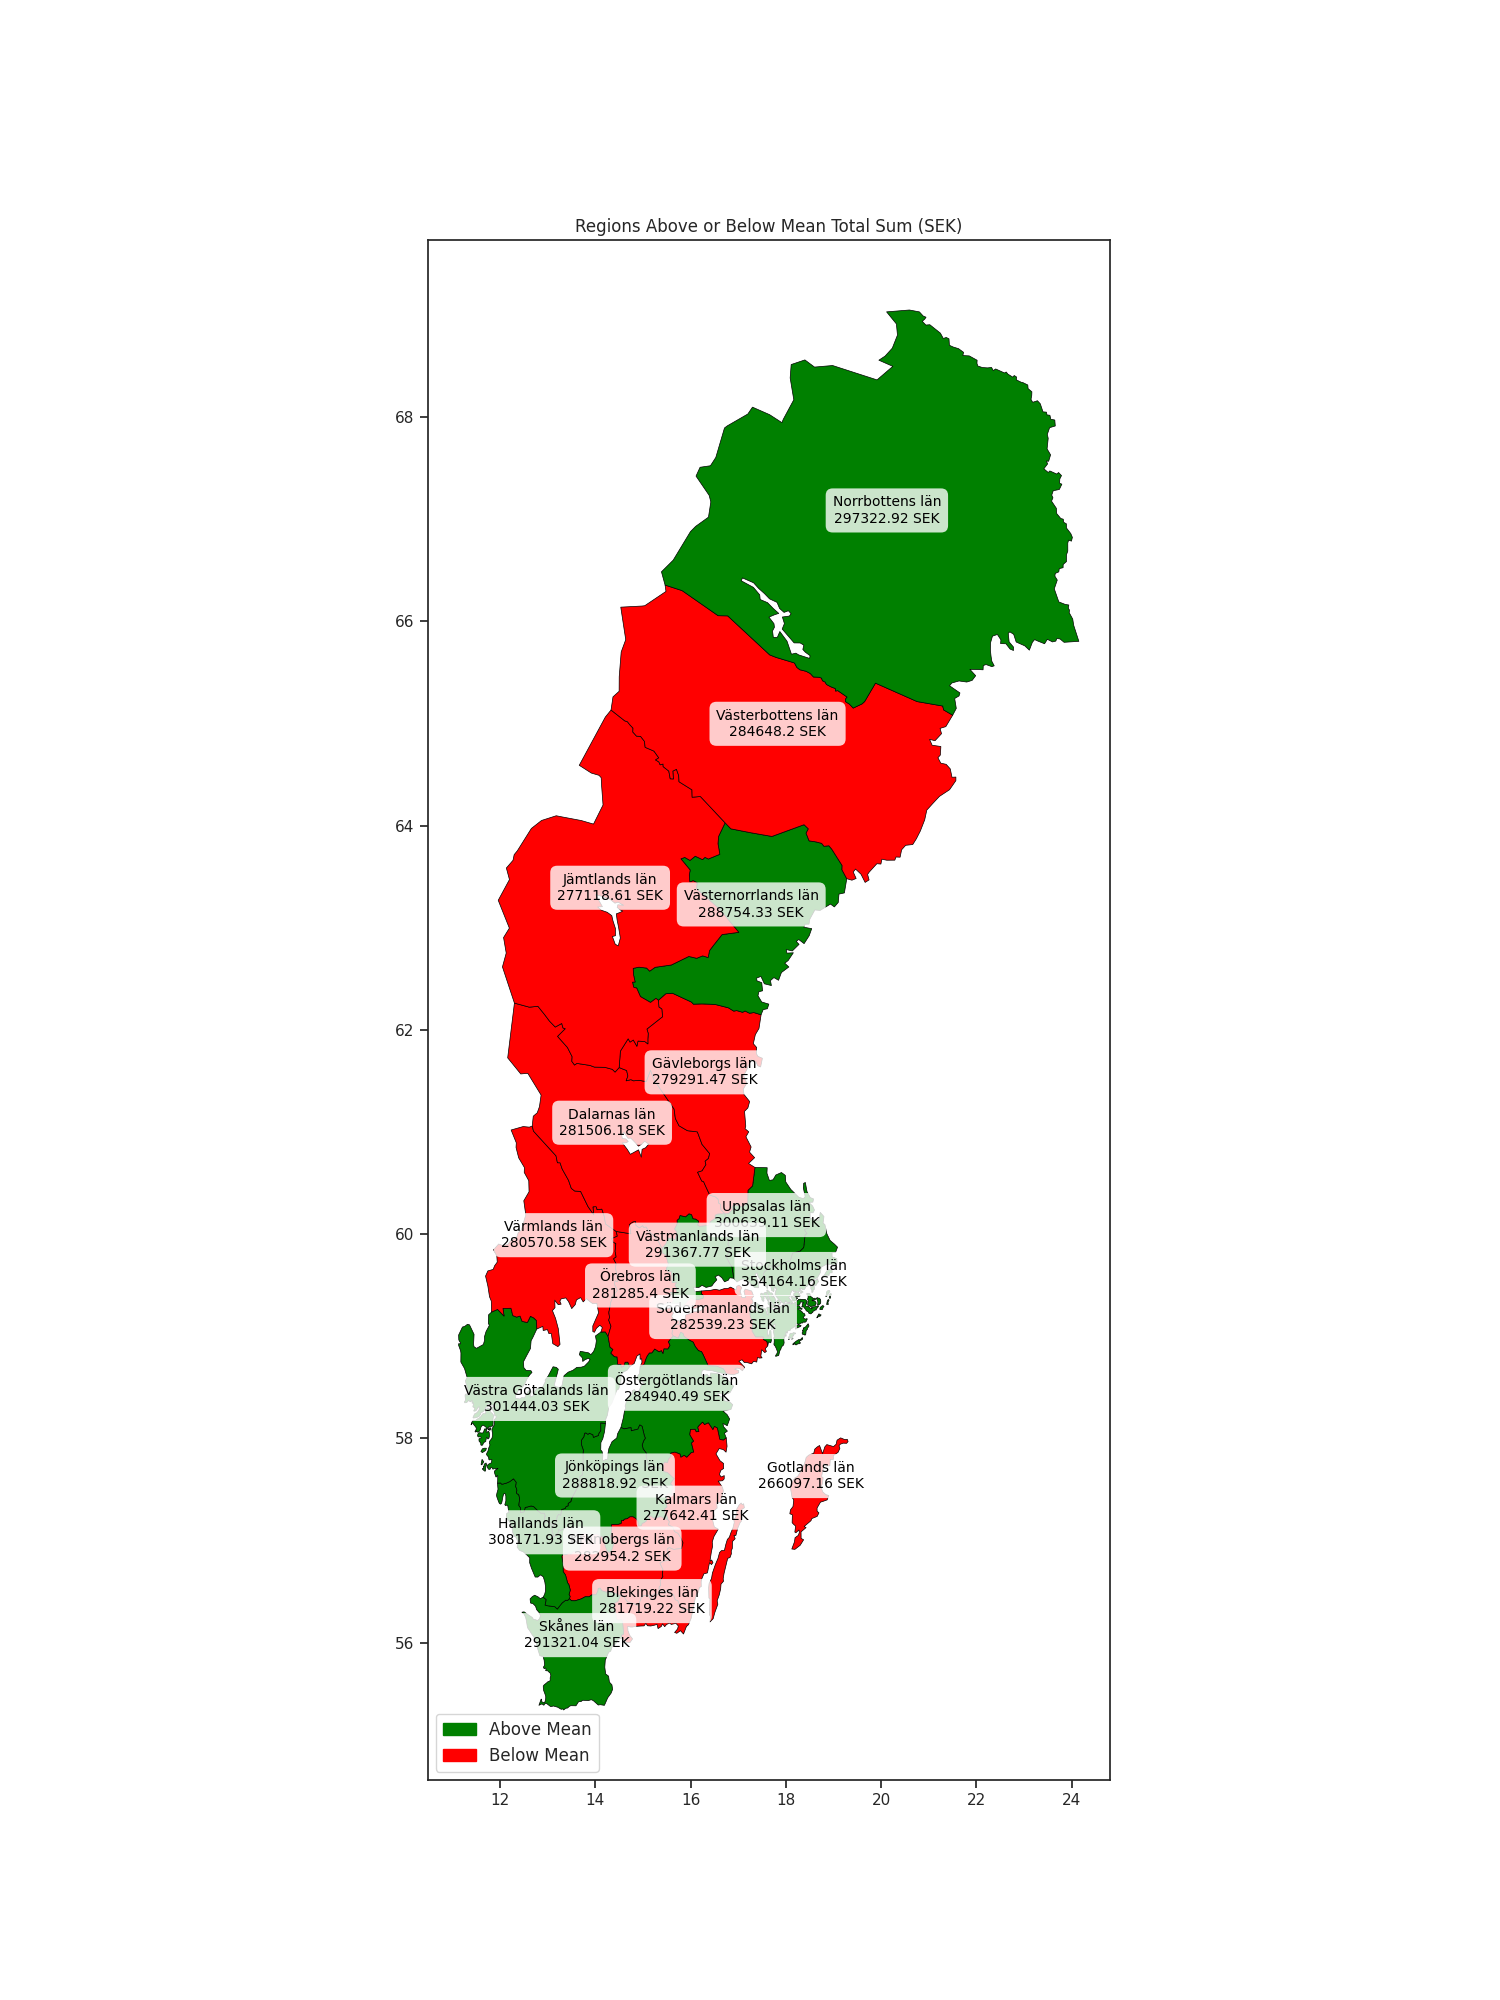

In [ ]:
gpd = merged
# Map True → green, False → red
gpd["color"] = gpd["Above Mean"].map({True: "green", False: "red"})
# Plot
ax = gpd.plot(color=gpd["color"], edgecolor="black", linewidth=0.5, figsize=(15, 20))

# Create manual legend
legend_labels = [
    mpatches.Patch(color="green", label="Above Mean"),
    mpatches.Patch(color="red", label="Below Mean")
]
plt.legend(handles=legend_labels,fontsize=12, loc="lower left")

#to set regions with their names and mean income
for idx, row in gpd.iterrows():
    region_name = row["Region Name"]
    mean_income = row["Income per Inhabitant/Year"]  

    #label with region name and income
    ax.text(
        row["geometry"].centroid.x,  #X-coordinate of the regions centroid
        row["geometry"].centroid.y,  #Y-coordinate of the regions centroid
        f"{region_name}\n{mean_income} SEK",  #label with region name and mean income
        fontsize=10,  
        ha="center",
        color="black",  
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5')
    )
plt.title("Regions Above or Below Mean Total Sum (SEK)")
plt.show()

Droping Sverige becuse we only intressted in regegion vs region.

In [ ]:
df_pivot = df_merged.pivot_table("total_sum_sek_millions", index="year", columns="Region Name")
df_pivot.columns
df_pivot = df_pivot.drop(columns=["Sverige"])


There is a way use a slider to look at them one by one. In a interactiv aproch this is to make it ezyer to look at the data.

/tmp/ipykernel_3987/2438741245.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = ax.legend(loc="upper left")


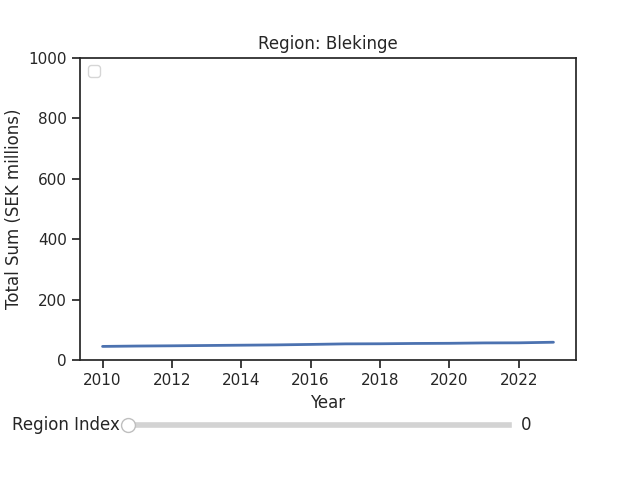

In [ ]:
#Turn on the interactive backend in Jupyter
%matplotlib widget
from matplotlib.widgets import Slider

df_pivot.index = df_pivot.index.astype(int)

#get regregion names 
region_names = df_pivot.columns.tolist()
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

#creata a legend
legend = ax.legend(loc="upper left")

#set up the plot
line, = ax.plot(df_pivot.index, df_pivot[region_names[0]], lw=2)
ax.set_title(f"Region: {region_names[0]}")
ax.set_xlabel("Year")
ax.set_ylabel("Total Sum (SEK millions)")
ax.set_ylim(0, 1000)

#slider setup
ax_slider = plt.axes([0.2, 0.1, 0.6, 0.03])
slider = Slider(
    ax=ax_slider,
    label='Region Index',
    valmin=0,
    valmax=len(region_names) - 1,
    valinit=0,
    valstep=1
)

#callback to uppdata when someone makes a change to the slider 
def update(val):
    idx = int(slider.val)
    region = region_names[idx]
    line.set_ydata(df_pivot[region])
    ax.set_title(f"Region: {region}")
    line.set_label(region)  #update label for the legend
    ax.legend(loc="upper left")
    fig.canvas.draw_idle()

slider.on_changed(update)
plt.show()
fig.canvas.draw_idle()

Instead of using a slider to switch between the different graphs, we use buttons to add or remove the regions we want to display in the graph.
The grahp shows total income year of year per reginon.

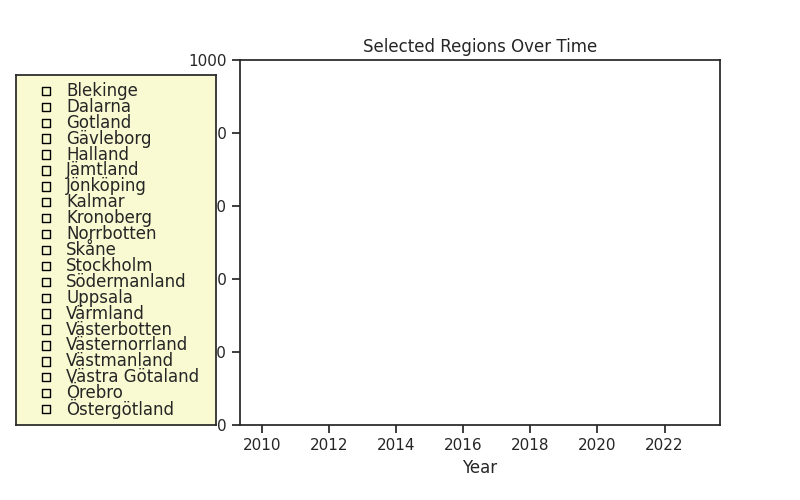

In [ ]:
# Turn on the interactive backend in Jupyter
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons


fig1, ax1 = plt.subplots(figsize=(8, 5))
plt.subplots_adjust(left=0.3, bottom=0.15)
ax1.set_xlabel("Year")
ax1.set_ylabel("Total Sum (SEK millions)")
ax1.set_ylim(0, 1000)
ax1.set_title("Selected Regions Over Time")

#plot all lines initially but set them invisible
lines = {}
line_colors = {}
for region in regions:
    ln, = ax1.plot(df_pivot.index, df_pivot[region], label=region, lw=2)
    ln.set_visible(False)
    lines[region] = ln
    line_colors[region] = ln.get_color()

#add the CheckButtons
rax = plt.axes([0.02, 0.15, 0.25, 0.7], facecolor='lightgoldenrodyellow')
check = CheckButtons(rax, regions, [False]*len(regions))

#def a callback function for when the buttons are uppdated
def func(label):
    line = lines[label]
    vis = not line.get_visible()
    line.set_visible(vis)

    #update legend to show only visible lines
    visible_lines = [l for r, l in lines.items() if l.get_visible()]
    ax1.legend(visible_lines, [r for r, l in lines.items() if l.get_visible()], loc="upper left")

    fig1.canvas.draw_idle()

check.on_clicked(func)

plt.show()
